In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import util

In [105]:
folder_path = 'datasets/kaggle_clement/'
train_file = 'train.csv'
test_file = 'test.csv'
save_file = 'test_pred.csv'
train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

In [106]:
model = Pipeline(steps=[('tfidf',TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)),('nb', MultinomialNB())])
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

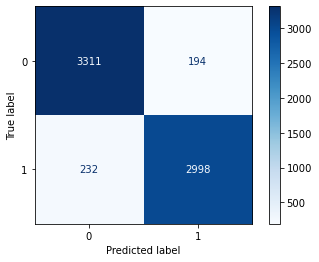

In [107]:
disp = plot_confusion_matrix(model, test_X, test_Y,cmap=plt.cm.Blues)

In [108]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, pred_Y) * 100, 2)) + "%")

Model Accuracy: 93.67%


In [109]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3505
           1       0.94      0.93      0.93      3230

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735



In [110]:
vocab=model.named_steps['tfidf'].vocabulary_
coef=list(model.named_steps['nb'].feature_log_prob_[1])
top_features=[]

for i in range(300):
    k = coef.index(max(coef))
    top_features.append(k)
    coef.pop(k)

for f in top_features:
    print({k:v for k, v in vocab.items() if v == f})


{'said': 82066}
{'trumka': 95529}
{'reuters': 79693}
{'president': 74270}
{'stasi': 88922}
{'house': 45439}
{'government': 40953}
{'washed': 100739}
{'republic': 79176}
{'unisplendour': 97596}
{'statementand': 88949}
{'nevio': 65511}
{'norsworthy': 66818}
{'token': 94237}
{'china': 21342}
{'miniskirt': 61859}
{'partnerships': 70613}
{'semitism': 84154}
{'korda': 53697}
{'electing': 32457}
{'rusholme': 81610}
{'ybor': 103646}
{'taverns': 92124}
{'websiteread': 101095}
{'secularist': 83895}
{'pepto': 71464}
{'whisker': 101617}
{'thunderdome': 93587}
{'tubridy': 95881}
{'coursing': 25000}
{'penthouses': 71419}
{'clinto': 22319}
{'donahoe': 30388}
{'fricking': 38211}
{'foreground': 37500}
{'campaign': 19086}
{'rusiackas': 81611}
{'stasi': 88922}
{'monastery': 62762}
{'oath': 67597}
{'militarily': 61663}
{'democracynow': 27915}
{'preservation': 74259}
{'iq': 48884}
{'administration': 7809}
{'webs': 101090}
{'offerman': 68035}
{'commitments': 23252}
{'lavin': 55187}
{'ntknetworkbarack': 6717